# Исследование стартапов

## Цель и задачи

**Цель:** подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - изучить данные более детально;
    - изучить взаимосвязь данных.
4. Сформулировать выводы по проведённому анализу и дать рекомендации.

## Данные

Для анализа поступили данные о стартапах. Данные состоят из пяти датасетов:
- `acquisition` - информация о покупках одними компаниями других компаний.
- `company_and_rounds` - информация о компаниях и раундах финансирования.
- `education` - информация об образовании сотрудника.
- `people` - информация о сотрудниках.
- `degrees` - информация о типе образования сотрудника.

К данным прилагается две дополнительные таблицы:
- `fund` - информация о фондах.
- `investment` - информация о раундах инвестирования.

### Описание датасета `acquisition`:

- `id` — идентификатор покупки.
- `acquiring_company_id` — идентификатор покупающей компании.
- `acquired_company_id` — идентификатор покупаемой компании.
- `term_code` — варианты расчёта.
- `price_amount` — сумма сделки.
- `acquired_at` — дата сделки.

### Описание датасета `company_and_rounds`:

- `company ID` — идентификатор компании.
- `name` — название компании.
- `category code` — категория области деятельности компании.
- `status` — статус компании.
- `founded at` — дата инвестирования.
- `closed at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network username` — ник компании в сети.
- `country code` — код страны компании.
- `investment rounds` — число инвестиционных раундов.
- `funding rounds` — число раундов финансирования.
- `funding total` — сумма финансирования.
- `milestones` — вехи финансирования.
- `funding round id` — идентификатор этапа финансирования.
- `company id` — идентификатор компании.
- `funded at` — дата финансирования.
- `funding round type` — тип финансирования.
- `raised amount` — сумма финансирования.
- `pre money valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is first round` — является ли раунд первым.
- `is last round` — является раунд последним.

### Описание датасета `education`:

- `id` — идентификатор записи об образовании.
- `person_id` — идентификатор работника.
- `instituition` — название учебного заведения.
- `graduated_at` — дата получения образования.

### Описание датасета `people`:

- `id` — идентификатор сотрудника.
- `first_name` — имя сотрудника.
- `last_name` — фамилия сотрудника.
- `company_id` — идентификатор компании.
- `network_username` — ник в социальных сетях.
  
### Описание датасета `degrees`:

- `id` — идентификатор записи.
- `object_id` — идентификатор сотрудника.
- `degree_type` — тип образования.
- `subject` — специальность.

### Описание датасета `fund`:

- `id` — идентификатор фонда.
- `name` — название фонда.
- `category_code` — категория области деятельности компании.
- `founded_at` — дата создания фонда.
- `domain` — сайт фонда.
- `network_username` — ник фонда в сети.
- `country_code` — код страны фонда.
- `investment_rounds` — число инвестиционных раундов.
- `invested_companies` — число профинансированных компаний.
- `milestones` — вехи финансирования.

### Описание датасета `investment`:

- `id` — идентификатор этапа инвестирования.
- `funding_round_id` — идентификатор раунда инвестирования.
- `company_id` — индентификатор компании.
- `funding_round_type` — тип финансирования.
- `fund_id` — идентификатор фонда.

## Структура проекта
1. [Знакомство с данными: загрузка и первичная предобработка.](#link_1)
2. [Предобработка данных, предварительное исследование.](#link_2)
3. Исследовательский анализ объединённых таблиц.
4. Итоговый вывод и рекомендации.
__________________

<a class='anchor' id="link_1"></a>

## 1. Знакомство с данными: загрузка и первичная предобработка.

### 1.1. Вывод общей информации, исправление названия столбцов.

Начнем с загрузки библиотек: pandas, numpy, matplotlib, seaborn, missingo для визуализаций. После чего выгрузим датасеты и сохраним их в переменные. 

In [1]:
# Подключаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install missingno -q
import missingno as msno

In [2]:
# Выгружаем основные датасеты в переменные
df_acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
df_company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
df_education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
df_people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
df_degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv') 

# Выгрузим дополнительные датасеты
df_fund = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
df_investment = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

Начнем знакомство с данными датасетов. Выведем первые пять строк датафрейма `df_acquisition` с помощью метода `head()` и информацию о нем методом `info()`:

In [3]:
df_acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [4]:
df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Датафрейм `df_acquisition` содержит 6 столбцов и 9407 строк, в которых содержится информация о покупках одних компаний другими. 

После первичного анализа можно сделать выводы:
- Названия столбцов отображают информацию, содержащуюся в них
- Названия столбцов приведены к единому стилю snake_case, нам не понадобится проводить корректировки
- Столбцы `id`, `acquiring_company_id`, `acquired_company_id`, `price_amount` представлены типом `int64`, что соотвествует содержимому. Однако для оптимизации работы с данными произведем понижение размерности.
- Столбец `term_code` представлен типом `object`. Тип данных корректен, так как информация содержит текстовые данные вариантов расчета.
- Столбец `acquired_at` содержит информацию о дате сделки, однако хранит данные типа `object`. Это некорректно. Для возможности работы с инструментами дат приведем его к типу `datetime`.
- Два столбца - `term_code` и `acquired_at` - содержат пропуски. И в том, и другом случае это могло стать технической ошибкой. Следует проверить другие столбцы на наличие маркеров-индикаторов.

Перейдем к знакомтсву с данными датафрейма `df_company_and_rounds`:

In [5]:
df_company_and_rounds.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Датафрейм `df_company_and_rounds` содержит 22 столбца и 217774 строк. В ходе первичного анализа мы выяснили, что: 
- Есть два дублирующихся столбца `company ID` и `company id`. Необходимо выяснить, причину такого явления.
- Также в датафрейме содержатся два столбца с информацией о сумме финансирования - `funding  total` и `raised  amount`.
- Двенадцать столбцов - `company  ID`, `investment  rounds`, `funding  rounds`, `funding  total`, `milestones`, `funding  round  id`, `company  id`, `raised  amount`, `pre  money  valuation`, `participants`, `is  first  round`, `is  last  round` - содержат информацию типа `float64`. Столбцы с информацией об id могли бы иметь тип `int`, однако в них встречаются пропуски. Для оптимизации данных понизим размерность всех столбцов с числовыми данными.
- Столбцы `name`, `category  code`, `status`, `domain`, `network  username`, `country  code`, `funding  round  type` имеют тип `object`, что корректно для них.
- Столбцы `founded  at`, `closed  at`, `funded  at` так же содержат информацию типа `object`, но для корректно работы с датами преобразуем эти столбцы к типу `datetime`.
- Все столбцы содержат пропуски данных.
- Названия столбцов неоходимо привести к единому стилю snake_case, так как сейчас в них используются пробелы.
- Данные совпадают с заявленным описанием датасета.

Приведем названия столбцов датафрейма `df_acquisition` к стилю snake case. Используя этот метод, у нас появится два столбца с одинаковым названием `company_id`, поэтому предварительно переименуем один из них.

In [7]:
# Переименовываем один столбец 
df_company_and_rounds = df_company_and_rounds.rename(columns = {'company  id':'company  id  2'})
# Заменяем два пробела на одно нижнее подчеркивание и преобразуем все в нижний регистр 
df_company_and_rounds.columns = df_company_and_rounds.columns.str.lower().str.replace('  ', '_')
#Выводим на экран результат
df_company_and_rounds.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_2', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

Теперь обратимся к датафрейму `df_education`: 

In [8]:
df_education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [9]:
df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Датафрейм `df_education` содержит 4 столбца и 109610 строк. Можно отметить, что:
- Названия столбцов приведены к стилю snake case, что будет удобно для последующей обработке данных.
- Столбцы `id`, `person_id` не имеют пропусков и представлены в типе данных `int64`, что правильно. Для оптимизации понизим размерность.
- Столбцы `instituition` содержит информацию типа `object`. Также в нем есть пропущенные значения. Это, может быть, как технической ошибкой, так и следствием отсутсвия образования у сотрудников компаний.
- Столбец `graduated_at` содержит пропуски. Аналогично их причиной может быть отсутствие образования или техническая ошибка, а так же незавершенность процесса обучения. Тип данных `object` необходимо поменять на временной формат, так как столбец содержит дату получения образования.

Приступим к первичной предобработке датафрейма `df_people`:

In [10]:
df_people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [11]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Датафрейм `df_people` состоит из 5 столбцов и 226709 строк. В нем присутствуют данные разных типов:
- Столбец `id` представлен типом `int64`, что верно. Однако для удобства понизим размерность.
- Столбец `company_id` содержит информацию типа `float64`. Из-за наличия в нем пропусков, которые могли быть вызваны технической ошибкой или увольнением работника из компании, он не имеет тип `int`, хотя там представлены целочисленные данные.
- Остальные столбцы, а именно `first_name`, `last_name` и `network_username`, содержат строковую информацию `object`.
  
Также стоит отметить, что:
- Названия столбцов корректны и приведены к стилю snake case.
- Все столбцы, кроме `id` содержат пропуски данных. Пропуски в `first_name` и `last_name` могут быть следствием технических сбоев, а отсутствие информации в `network_username` могут объясняться той же причиной или же отсутсвием социальных сетей у работников компании.

Теперь перейдем к изучению датафрейма `df_degrees`:


In [12]:
df_degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [13]:
df_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Датафрейм содержит 4 столбца и 109610 строк с информацией о типе образования сотрудников. Отметим, что:
- Столбец `id` - единственный, хранящий информацию типа `int64` столбец. Формат данных выбран корректно, однако проведем его оптимизацию.
- Столбцы `object_id`, `degree_type`, `subject` хранят информацию типа `object`.
- Столбцы `degree_type`, `subject` содержат пропуски, причиной которых могут быть технические сбои или отсутсвие образования о сотрудников.
- Важно, что формат записи id сотрудника в этом датафрейме не совпадает с записями в `df_people`. Стоит учесть это различие при последующей обработке.

Обратимся к датафрейму `df_fund`.

In [14]:
df_fund.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [15]:
df_fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


Датафрейм состоит из 9 столбцов и 11652 строк. 
- Названия столбцов корректны и отображают содержимое. 
- Столбцы `id`, `investment_rounds`, `invested_companies`, `milestones` имеют тип данных `int64`, что корректно для числовых данных. Однако мы проведем оптимизацию этих столбцов для понижения размерности.
- Столбцы `name`, `category_code`, `domain`, `network_username`, `country_code` представлены типом `object`.
- Столбец `founded_at` нужно привести к формату даты `datetime`.
- Отсутствует стоолбец `category_code` — категория области деятельности компании, заявленный в описании.

Продолжим изучение дополнительных датафреймов. На этот раз обратим внимание на `df_investment`:

In [16]:
df_investment.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [17]:
df_investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


Датафрейм состоит из 4 столбцов и 61403 строк. Названия столбцов приведены к стилю snake_case и соответствуют описанию. Все столбцы корректно представлены типом `int64`. Понизим из размерность для оптимизации. 

### 1.2. Смена типов и анализ пропусков

Для начала оптимизируем числовые типы данных всех датафреймов с помощью функции:


In [18]:
# Оптимизация числовых типов данных
def optimize_memory_usage(df: pd.DataFrame, print_size: bool=True) -> pd.DataFrame:
        '''
        Function optimizes memory usage in dataframe
        df: pd.DataFrame - data table
        print_size: bool - display of optimization results
        return pd.DataFrame - amount of optimized memory
        '''
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # Типы, которые будем проверять на оптимизацию
        # Размер занимаемой памяти до оптимизации (в Мб)
        before_size = df.memory_usage().sum() / 1024**2    
        for column in df.columns:
            column_type = df[column].dtypes
            if column_type in numerics:
                column_min = df[column].min()
                column_max = df[column].max()
                if str(column_type).startswith('int'):
                    if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                        df[column] = df[column].astype(np.int8)
                    elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                        df[column] = df[column].astype(np.int16)
                    elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                        df[column] = df[column].astype(np.int32)
                    elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                        df[column] = df[column].astype(np.int64)  
                else:
                    if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                        df[column] = df[column].astype(np.float32)
                    else:
                        df[column] = df[column].astype(np.float64)    
        # Размер занимаемой памяти после оптимизации (в Мб)
        after_size = df.memory_usage().sum() / 1024**2
        if print_size: print('Размер использования памяти: до {:5.2f} Mb - после {:5.2f} Mb ({:.1f}%)'
                             .format(before_size, after_size, 100 * (before_size - after_size) / before_size))
        return df

In [19]:
optimize_memory_usage(df_acquisition)
optimize_memory_usage(df_company_and_rounds)
optimize_memory_usage(df_education)
optimize_memory_usage(df_people)
optimize_memory_usage(df_degrees)
optimize_memory_usage(df_fund)
optimize_memory_usage(df_investment)

Размер использования памяти: до  0.43 Mb - после  0.31 Mb (29.2%)
Размер использования памяти: до 36.55 Mb - после 26.58 Mb (27.3%)
Размер использования памяти: до  3.35 Mb - после  2.51 Mb (25.0%)
Размер использования памяти: до  8.65 Mb - после  6.92 Mb (20.0%)
Размер использования памяти: до  3.35 Mb - после  2.93 Mb (12.5%)
Размер использования памяти: до  0.80 Mb - после  0.52 Mb (34.7%)
Размер использования памяти: до  1.87 Mb - после  0.82 Mb (56.2%)


,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5
...,...,...,...,...
61398,61399,57926,15847,173
61399,61400,57926,15847,1290
61400,61401,57926,15847,73
61401,61402,57942,70841,15098


Мы оптимизировали использованием памяти компьютера. Теперь перейдем к преобразованию данных в формат `datetime`.

In [20]:
# Проведем изменение типа данных столбца 'acquired_at' первого датафрейма
df_acquisition['acquired_at'] = pd.to_datetime(df_acquisition['acquired_at'])
# Для второго датафрейма напишем цикл, который преобразует нужные столбцы к формату 'datetime'
for column in ['founded_at', 'closed_at', 'funded_at']:
    df_company_and_rounds[column] = pd.to_datetime(df_company_and_rounds[column])
# В третьем датафрейме преобразуем во временной формат столбец 'graduated_at'
df_education['graduated_at'] = pd.to_datetime(df_education['graduated_at'])
# В датафрейме df_fund преобразуем во временной формат столбец 'founded_at'
df_fund['founded_at'] = pd.to_datetime(df_fund['founded_at'])

Теперь все столбцы датафреймов имеют корректные типы данных. 

In [21]:
display('Количество пропусков в датафрейме df_acquisition')
df_acquisition.isna().sum()

'Количество пропусков в датафрейме df_acquisition'

id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

In [22]:
display('Доля пропусков в датафрейме df_acquisition')
df_acquisition.isna().sum() / df_acquisition.shape[0]

'Доля пропусков в датафрейме df_acquisition'

id                      0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
term_code               0.805358
price_amount            0.000000
acquired_at             0.003083
dtype: float64

Анализируя пропуски в датафрейме `df_acquisition`, заметим, что в столбце `term_code` 80,5% строк составляют пропуски. В данном столбце хранится информация о вариантах расчета при покупке одной компании другой. Можно предположить, что такое количество пустых строк связано с деланием сохранить конфиденциальность данных о финансовых операциях. Другой вариант - это техническая ошибка. В дальнейшем мы можем заменить пустые значения на 'заглушки' или же не трогать их вовсе, так как данный столбец не понадобится нам для исследования. 

В столбце `acquired_at` содержится 0.31% пустых строк. Причиной этому могут быть технические ошибки. Например, при проведении безналичной операции произошел сбой и дата не записалась. Также это может быть связано с политикой конфиденциальности компаний. При необходимости поставим 'заглушку' на пропуски этого столбца или удалим пустые строки. 

In [23]:
display('Количество пропусков в датафрейме df_company_and_rounds')
df_company_and_rounds.isna().sum()

'Количество пропусков в датафрейме df_company_and_rounds'

company_id                302
name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id_2           164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

In [24]:
display('Доля пропусков в датафрейме df_company_and_rounds')
df_company_and_rounds.isna().sum() / df_company_and_rounds.shape[0]

'Доля пропусков в датафрейме df_company_and_rounds'

company_id             0.001387
name                   0.001387
category_code          0.339288
status                 0.001387
founded_at             0.495091
closed_at              0.984162
domain                 0.324258
network_username       0.561316
country_code           0.501286
investment_rounds      0.001387
funding_rounds         0.001387
funding_total          0.001387
milestones             0.001387
funding_round_id       0.756959
company_id_2           0.756959
funded_at              0.758098
funding_round_type     0.756959
raised_amount          0.756959
pre_money_valuation    0.756959
participants           0.756959
is_first_round         0.756959
is_last_round          0.756959
dtype: float64

Дополнительно построим тепловую карту взаимосвязей пропусков, чтобы понимать зависят ли пропуски в одном столбце от наличия пропусков в других.

- Значения, близкие к +1, означают, что наличие пропусков в одном столбце связано с наличием пропусков в другом. Чем ближе значение к +1, тем сильнее эта связь.
- Значения, близкие к -1, означают, что наличие пропусков в одном столбце противоположно наличию пропусков в другом. Если в одном столбце есть пропуски, то в другом их нет, и наоборот.
- Значения, близкие к 0, означают, что связь между пропусками в столбцах отсутствует.

<AxesSubplot:>

<Figure size 504x216 with 0 Axes>

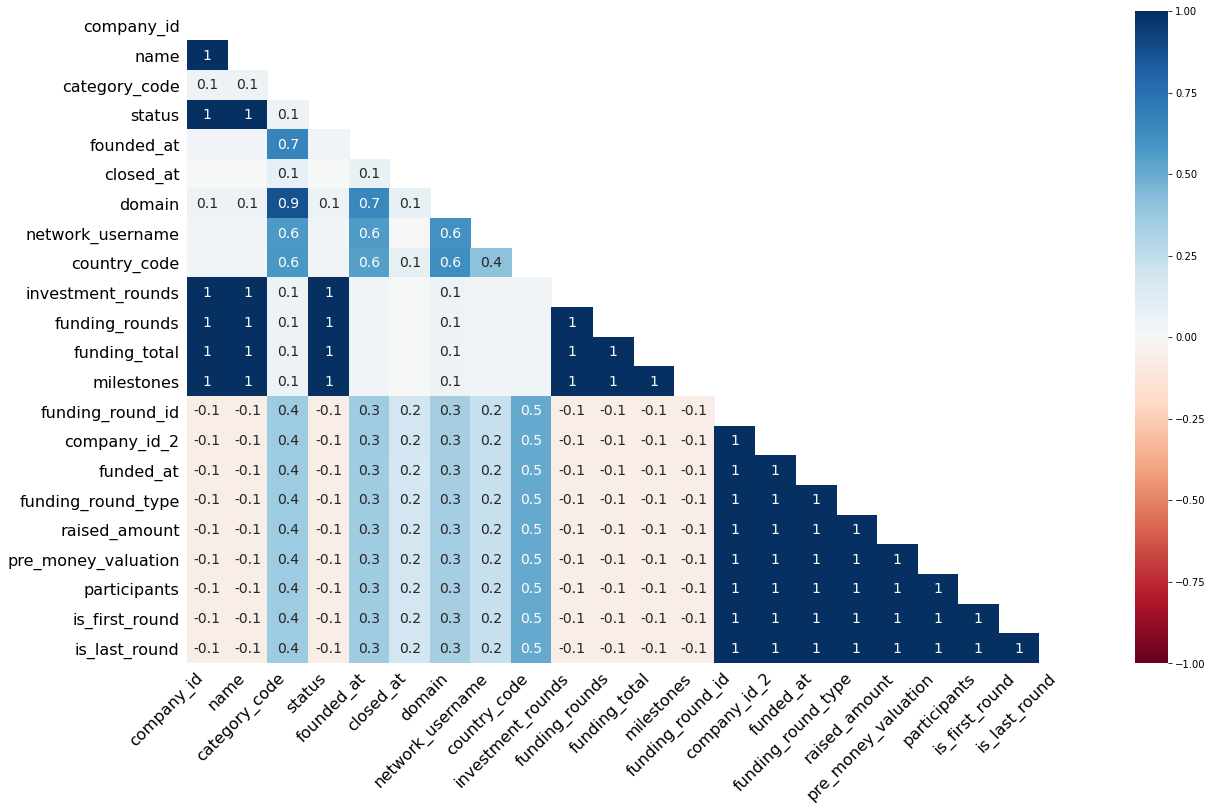

In [25]:
# Строим тепловую карту
plt.figure(figsize = (7,3))
msno.heatmap(df_company_and_rounds)

Сразу заметно, что датафрейм `df_company_and_rounds`, хранящий информацию о компаниях и раундах финансирования, содержит пропуски во всех столбцах.
- Можно заметить, что столбцы `company_id`, `status`, `investment_rounds`, `funding_rounds`, `milestones` содержат одинаковое количество пропусков - 0.14% и коэффициент связи между их пропусками равен 1. Возможно, что из-за утери информации об идентификационном номере компании в связи с техническими ошибками потерялась и остальная часть сведений.
- Пропуски в столбце `category_code` (33.93%) можно объяснить как техническими ошибками, так и отсутсвием опредеденной категории деятельности компании в случае, когда она представлена в разных сферах.
- У пропусков в столбце `founded_at`(49.5%) могут быть несколько причин: тех.ошибки или же отсутствие инвестиций со стороны компании.
- Попуски в столбце `closed_at` (98.4%) можно объяснить тем, что большая часть компаний до сих пор функционируют.
- Восемь столбцов: `funding_round_id`, `company_id_2`, `funding_round_type`, `raised_amount`, `pre_money_valuation`, `participants`, `is_first_round`, `is_last_round` содержат по 75.7% пропусков и, глядя на тепловую карту, мы видим что пропуски полностью взаимосвязаны. Возможно, что при сборе этого датасета потерялась часть ключевого столбца (напремер, `funding_round_id` или `company_id_2` и стало невозможным заполнить остальные данные).
- В будущем попробуем заполнить пропуски данными из датафрейма `df_investment`.
- Как мы заметили при первичной предобработке данных, в датафрейме два столбца с идентификационным номером компании, причем они содержат разное количество ошибок. Можно проверить, возможно ли объединить их в один столбец при условии, что известные id являются дубликатами друг друга в двух столбцах. Тогда 302 пропуска в первом столбце мы заполним значениями из второго.
- Помимо этого, в датафрейме содержатся два столбца с информацией о сумме финансирования - `funding  total` и `raised  amount`.


Перейдем к анализу пропусков в датафрейме `df_education`:

In [26]:
display('Количество пропусков в датафрейме df_education')
df_education.isna().sum()

'Количество пропусков в датафрейме df_education'

id                  0
person_id           0
instituition       55
graduated_at    51556
dtype: int64

In [27]:
display('Доля пропусков в датафрейме df_education')
df_education.isna().sum() / df_education.shape[0]

'Доля пропусков в датафрейме df_education'

id              0.000000
person_id       0.000000
instituition    0.000502
graduated_at    0.470359
dtype: float64

По данным видно, что пропуски содержаться в двух столбцах:
- Столбец `instituition`: 55 пропусков, что составляет менее 1% датафрейма. Возможно, некоторые сотрудники не получали образования, поэтому этот столбец для них не заполнен.
- Столбец `graduated_at`: 47% пропусков. Это можно объяснить тем, что часть сотрудников либо не получали образования, либо все еще в процессе обучения.

Рассмотрим пропуски в датафрейме `df_people`:

In [28]:
display('Количество пропусков в датафрейме df_people')
df_people.isna().sum()

'Количество пропусков в датафрейме df_people'

id                       0
first_name               5
last_name                1
company_id          192094
network_username    187842
dtype: int64

In [29]:
display('Доля пропусков в датафрейме df_people')
df_people.isna().sum() / df_people.shape[0]

'Доля пропусков в датафрейме df_people'

id                  0.000000
first_name          0.000022
last_name           0.000004
company_id          0.847315
network_username    0.828560
dtype: float64

Заметим, что столбцы `first_name` и `last_name` содержат менее чем по 1% пропусков. Вероятно, это технические ошибки, которые привели к неполноте заполнения данных. Восстановить их, к сожалению, не получится. 
Столбцы `company_id`, `network_username` содержат по 84.73% и 82.86% пропусков соотвественно. Это говорит о том, что данных для анализа недостаточно. 

Перейдем к анализу пропусков в датафрейме `df_degrees`:

In [30]:
display('Количество пропусков в датафрейме df_degrees')
df_degrees.isna().sum()

'Количество пропусков в датафрейме df_degrees'

id                 0
object_id          0
degree_type    11218
subject        28312
dtype: int64

In [31]:
display('Доля пропусков в датафрейме df_degrees')
df_degrees.isna().sum() / df_degrees.shape[0]

'Доля пропусков в датафрейме df_degrees'

id             0.000000
object_id      0.000000
degree_type    0.102345
subject        0.258298
dtype: float64

- Первые два столбца - `id` и `object_id` - не содержат пропусков.
- Столбцы `degree_type` и `subject` содержат по 10.24% и 25.83% пропусков соответсвенно. 

В целом, данных для анализа достаточно. Перейдем к дополнительным датафреймам. 

In [32]:
display('Количество пропусков в датафрейме df_fund')
df_fund.isna().sum()

'Количество пропусков в датафрейме df_fund'

id                       0
name                     2
founded_at            7047
domain                4290
network_username      9503
country_code          4599
investment_rounds        0
invested_companies       0
milestones               0
dtype: int64

In [33]:
display('Доля пропусков в датафрейме df_fund')
df_fund.isna().sum() / df_degrees.shape[0]

'Доля пропусков в датафрейме df_fund'

id                    0.000000
name                  0.000018
founded_at            0.064292
domain                0.039139
network_username      0.086698
country_code          0.041958
investment_rounds     0.000000
invested_companies    0.000000
milestones            0.000000
dtype: float64

В датафрейме `df_fund` содержится четыре столбца с пропусками:
- Столбец `founded_at` с датой создания фонда хранит 6.43% пустых значений. Скорее всего, это технические ошибки.
- Столбец `domain`: 3.91%. Возможно, что это технические ошибки или же фонды не имеют собственных сайтов.
- Столбец `network_username`: 8.67%. Причиной могут быть ошибки при сборе информации, так и простое отсутствие у фонда ника в сети.
- Столбец `country_code`: 4.2%. Вероятно, это технические ошибки, но также это может быть следствием неопределенного статуса фонда, международного уровня организации или это фонды, связанные с криптовалютой (они могут отступать от четких стандартов регистрации). 

In [34]:
display('Количество пропусков в датафрейме df_investment')
df_investment.isna().sum()

'Количество пропусков в датафрейме df_investment'

id                  0
funding_round_id    0
company_id          0
fund_id             0
dtype: int64

In [35]:
display('Доля пропусков в датафрейме df_investment')
df_investment.isna().sum() / df_degrees.shape[0]

'Доля пропусков в датафрейме df_investment'

id                  0.0
funding_round_id    0.0
company_id          0.0
fund_id             0.0
dtype: float64

Пропусков в данных датафрейма `df_investment` нет. 

### Промежуточные выводы

В результате первичной предобработки данных были выполнены следующие действия:
- Названия столбцов датафреймов приведены к единому стилю snake case.
- Мы оптимизировали типы данных для анализа: понизили размерность и поработали со столбцами, храняящими дату, приведя их к типу `datetime64`.

Было выявлено, что датафрейм `df_company_and_rounds` содержит много пропусков, что может помешать дальнейшем анализу данных в связи с их недостаточностью. Поэтому мы проведем дополнительную обработку. Помимо этого, добавим столбец `year_of_funding_round`, выделив год из даты. Это облегчит нам работу при составлении статистики по годам. 

Датафрейм `df_people` содержит 85% пропусков в важном для анализа столбце `company_id`. Это говорит о большой неполноте данных и малой выборке сотрудников, которые подойдут для анализа связи размера компании и данных об образовании. 
_________

<a class='anchor' id="link_2"></a>

## 2. Предобработка данных, предварительное исследование
### 2.1. Раунды финансирования по годам

Это задание мы будем выполнять без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`. Нам необходимо составить сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан типичный размер средств, выделяемый в рамках одного раунда и общее количество раундов финансирования за этот год, и оставить в ней только те года, по которым известно более чем о 50 раундах финансирования. 

Для начала создадим дополнительный столбец `year_of_funding_round`, в котором сохраним год раунда финансирования. 

In [36]:
# Извлекаем год из даты финансирования
df_company_and_rounds['year_of_funding_round'] = df_company_and_rounds['funded_at'].dt.year

Приступим к созданию сводной таблицы. 

In [37]:
# Группируем данные по годам
grouped = df_company_and_rounds.groupby('year_of_funding_round')['raised_amount'].agg(['mean', 'count'])
# Создаем сводную таблицу, отфильтровав по количеству раундов 
pivot_year = pd.pivot_table(grouped[grouped['count']> 50],
                            index = 'year_of_funding_round',
                            values = ['count', 'mean'])
pivot_year = pivot_year.reset_index()
# Переименуем названия столбцов 
pivot_year.rename(columns={'year_of_funding_round': 'Год', 'count': 'Количество раундов финансирования', 'mean': 'Средний размер средств'}, inplace=True)
# Приведем количество райндов финансирования и год в тип integer
pivot_year['Количество раундов финансирования'] = pivot_year['Количество раундов финансирования'].astype('int')
pivot_year['Год'] = pivot_year['Год'].astype('int')
# Создаю окрашенную версию таблицы
pivot_year_styler = pivot_year.style.background_gradient(subset = ['Количество раундов финансирования', 'Средний размер средств'], cmap='BuGn', axis=0)
pivot_year_styler

,Год,Количество раундов финансирования,Средний размер средств
0,1999,76,7420241.500000
1,2000,125,11485509.000000
2,2001,96,8761519.000000
3,2002,116,7836196.000000
4,2003,159,5725049.500000
5,2004,291,7593645.500000
6,2005,1633,9324877.000000
7,2006,2436,8404267.000000
8,2007,3279,8931094.000000
9,2008,3774,10191804.000000


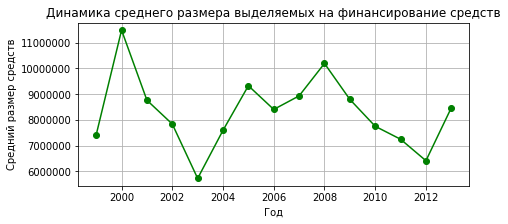

In [38]:
from matplotlib import ticker
from matplotlib.ticker import ScalarFormatter

pivot_line = pivot_year.plot(kind = 'line',
                             title = 'Динамика среднего размера выделяемых на финансирование средств',
                             ylabel = 'Средний размер средств',
                             figsize = (7,3),
                             x = 'Год',
                             y = 'Средний размер средств',
                            color = 'green',
                            legend = False,
                            marker = 'o')
plt.ticklabel_format(style='plain', axis='y')
plt.grid()

Таким образом, максимальный типичный размер собранных на раунд финансирования средств был максимален в 2000 году. Тогда он составил 11485509 денежных единиц. 

До 2013 года была видна четкая теденция роста количества раундов финансирования, в то время как средний размер средств выделяемых на один раунд претерпевал и рост, и падение. Это объясняется тем, что финансироваться стали стартапы разных размеров. Это говорит об эпохе начала финансирования в мелкие стартапы, сопровождающейся ростом технологий и доступностью капитала. 
___

### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений об образовании сотрудников от размера компаний. Для этого нам нужно оценить, насколько информация об образовании сотрудников полна и , используя датафреймы `df_people` и `df_education`, разделить все компании на несколько групп по количеству сотрудников и оценить среднюю долю сотрудников без информации об образовании в каждой из групп.

В пункте 1.2 мы изучали количество пропусков в датафреймах и пришли к выводу, что большая часть данных (около 85%) столбца `company_id` датафрейма `df_people` содержит пропуски, а значит, мы не сможем использовать эти строки для анализа связи между полнотой сведений и размером компании. Для удобства создадим новый датафрейм `df_people_filtered`, в котором не будет строк с пропусками в этом столбце. 

In [39]:
# Фильтруем датафрейм и создаем новый 
df_people_filtered = df_people.loc[df_people['company_id'].isna() == False]
df_people_filtered = df_people_filtered.rename(columns = {'id':'id_people'})
# Выведем информацию о новом датафрейме
df_people_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34615 entries, 0 to 226706
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_people         34615 non-null  int32  
 1   first_name        34614 non-null  object 
 2   last_name         34614 non-null  object 
 3   company_id        34615 non-null  float32
 4   network_username  17313 non-null  object 
dtypes: float32(1), int32(1), object(3)
memory usage: 1.3+ MB


Мы получили датафрейм, состоящий из 5 столбцов и 34615 строк. Данные достаточного для анализа объема. Объединим его с датафреймом `df_education` левым методом, так как тогда в датафрейм войдут записи:
- сотрудников, которых даже нет в датафрейме с информацией об образовании
- сотрудников, которые есть в датафрейме с информацией об образовании, но имеют там пропуски в столбцах `instituition` и `graduated_at`
- сотрудников, которые есть в датафрейме с информацией об образовании и имеют заполненную информацию об образовании.

В дальнейшем анализе первые две категории будут рассматриваться как сотрудники без информации об образовании. 

In [40]:
# Объединяем датафреймы
df_people_and_education = df_people_filtered.merge(df_education, left_on = 'id_people', right_on = 'person_id', how = 'left')
# Выводим информацию 
df_people_and_education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44789 entries, 0 to 44788
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_people         44789 non-null  int32         
 1   first_name        44788 non-null  object        
 2   last_name         44788 non-null  object        
 3   company_id        44789 non-null  float32       
 4   network_username  22892 non-null  object        
 5   id                28638 non-null  float64       
 6   person_id         28638 non-null  float64       
 7   instituition      28609 non-null  object        
 8   graduated_at      20954 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float32(1), float64(2), int32(1), object(4)
memory usage: 3.1+ MB


Мы получили новый датафрейм `df_people_and_education`, который состоит из 9 столбцов и 44762 строк.
- Все столбцы, кроме `id_people` и `company_id` содержат пропуски. Это не помешает дальнейшей обработке информации.
- Переименуем некоторые столбцы, чтобы не запутаться в них. 


In [41]:
# Переименовываем два столбца 
df_people_and_education = df_people_and_education.rename(columns = {'id': 'education_id', 'person_id': 'education_person_id'})

In [42]:
grouped_company = df_people_and_education.groupby('company_id')['id_people'].count()
grouped_company.sort_values()

company_id
70873.0       1
74306.0       1
74313.0       1
74318.0       1
74323.0       1
           ... 
4175.0       89
231067.0    111
1242.0      192
29.0        221
59.0        376
Name: id_people, Length: 22922, dtype: int64

Поделим все компании на четыре группы:
1. Микропредприятия: обычно имеют до 10 сотрудников.
2. Малые предприятия: имеют от 11 до 50 сотрудников.
3. Средние предприятия: имеют от 51 до 250 сотрудников.
4. Крупные предприятия: имеют более 250 сотрудников.

Для этого создадим из полученной таблицы датафрейм и добавим в него столбец `category` с помощью функции.

In [43]:
# Корректируем датафрейм
df_grouped_company = pd.DataFrame(grouped_company)
df_grouped_company = df_grouped_company.reset_index()
df_grouped_company = df_grouped_company.rename(columns = {'id_people':'people_count'})

In [44]:
# Функция принимает на вход столбец датафрейма и присваивает категорию исходя из значения содержимого 
def category_function(x):
    if x <= 10:
        return 'микрокомпания' 
    elif x <=50:
        return 'малая компания'
    elif x <= 250:
        return 'средняя компания'
    elif x > 250:
        return 'крупная компания'
# Применяем функцию 
df_grouped_company['category'] = df_grouped_company['people_count'].apply(category_function)

Теперь проведем анализ этих категорий на полноту информации об образовании. Для начала соединим этот датафрейм с датафремом `df_people_and_education`, чтобы добавить туда столбец с информацией о категории компании.

In [45]:
df_merged = df_people_and_education.merge(df_grouped_company, on = 'company_id', how = 'left')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44789 entries, 0 to 44788
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id_people            44789 non-null  int32         
 1   first_name           44788 non-null  object        
 2   last_name            44788 non-null  object        
 3   company_id           44789 non-null  float32       
 4   network_username     22892 non-null  object        
 5   education_id         28638 non-null  float64       
 6   education_person_id  28638 non-null  float64       
 7   instituition         28609 non-null  object        
 8   graduated_at         20954 non-null  datetime64[ns]
 9   people_count         44789 non-null  int64         
 10  category             44789 non-null  object        
dtypes: datetime64[ns](1), float32(1), float64(2), int32(1), int64(1), object(5)
memory usage: 3.8+ MB


Перейдем к созданию датафрейма, в котором отобразим нужную информацию. 

In [46]:
# Узнаем, сколько людей в каждой категории компаний не имели данных в датафрейме df_education
grouped = df_merged.groupby('category')['education_id'].apply(lambda x: x.isna().sum()).reset_index()
grouped = grouped.rename(columns = {'education_id':'no_inf_part'})
grouped 

,category,no_inf_part
0,крупная компания,76
1,малая компания,982
2,микрокомпания,14875
3,средняя компания,218


In [47]:
# Узнаем, сколько людей в каждой категории компаний имели запись в датафрейме df_education, но столбцы 'instituition' и 'graduated_at' были пусты
grouped_1 = df_merged[(df_merged['instituition'].isna() == True) & (df_merged['graduated_at'].isna() == True) & (df_merged['education_id'].isna() == False)].groupby('category')['instituition'].apply(lambda x: x.isna().sum())
# Используем reindex(), чтобы сохранить категорию 'крупная компания', так как ни один сотрудник из нее не удовлетворяет условию
grouped_1 = grouped_1.reindex(df_merged['category'].unique(), fill_value=0)
grouped_1.reset_index()


,category,instituition
0,средняя компания,2
1,малая компания,1
2,микрокомпания,4
3,крупная компания,0


In [48]:
# Считаю, сколько всего сотрудников
all_people_grouped = df_merged.groupby('category')['id_people'].count()
all_people_grouped = all_people_grouped.reset_index()
all_people_grouped = all_people_grouped.rename(columns = {'id_people':'Всего сотрудников'})
# Создадим датафрейм, в котором узнаем долю сотрудников без информации об образовании по категориям
final_grouped = grouped.merge(grouped_1, on = 'category', how = 'right')
# Считаем общее число сотрудников без информации об образовании по категориям
final_grouped['Сотрудники без информации об образовании'] = final_grouped['no_inf_part'] + final_grouped['instituition']
# Присоединяем датафрейм с общим числом сотрудников по каждой категории
final_grouped = final_grouped.merge(all_people_grouped, on = 'category', how = 'right')
# Удаляем лишние столбцы
final_grouped = final_grouped.drop(columns = ['no_inf_part','instituition'])
# Считаем долю сотрудников без информации об образовании по категориям
final_grouped['Доля сотрудников без информации об образовании'] = final_grouped['Сотрудники без информации об образовании'] / final_grouped['Всего сотрудников']
final_grouped

,category,Сотрудники без информации об образовании,Всего сотрудников,Доля сотрудников без информации об образовании
0,крупная компания,76,376,0.202128
1,малая компания,983,3546,0.277214
2,микрокомпания,14879,39635,0.375401
3,средняя компания,220,1232,0.178571


Мы получили датафрейм, в котором содержится информация о:
- количестве сотрудников без информации об образовании по категориям компаний
- общем количестве сотрудников по категориям компаний
- доле сотрудников без информации об образовании по категориям компаний

Теперь визуализируем полученный результат.

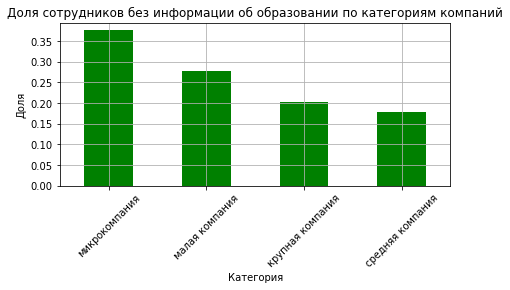

In [49]:
categories_stat = final_grouped.sort_values(by = 'Доля сотрудников без информации об образовании', ascending = False).plot(kind = 'bar',
                             title = 'Доля сотрудников без информации об образовании по категориям компаний',
                             ylabel = 'Доля',
                             xlabel = 'Категория',
                             figsize = (7,3),
                             x = 'category',
                             y = 'Доля сотрудников без информации об образовании',
                            color = 'green',
                            legend = False,
                                    rot = 45)
plt.grid()

Можно заметить, что наиболее часто отсутствует информация об образовании у сотрудников микрокомпаний и малых компаний, 38% и 28% соответственно. Причиной этому могут стать опасения проигрыша в конкуренции с более крупными компаниями в связи с более низким уровнем образования сотрудников.

Примерно одинаковый уровень пропусков в информации об образовании сотрудников имеют крупные и средние компании (18 и 20% соотвественно). Эти компании тоже могут бояться предвзятости со стороны клиентов. Также причиной может быть политика конфиденциальности. 

Выясним, возможно ли присоединить к датафреймам `df_education` и `df_people` датафрейм `df_degrees`. Как мы отмечали ранее, идентификационные номера сотрудников в нем записаны в другой форме. Уберем из них подстроку `p:`.

In [50]:
# Выведем пять первых строк
df_degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [51]:
# Убираем подстроку
df_degrees['object_id'] = df_degrees['object_id'].str.replace('p:', '')

In [52]:
# Меняем тип данных
df_degrees['object_id'] = df_degrees['object_id'].astype('float')

Объединим датафреймы `df_people_and_education` и `df_degrees` после преобразований.

In [53]:
df_merged_all = df_people.merge(df_degrees, left_on = 'id', right_on = 'object_id', how = 'inner')

In [54]:
# Выведем информацию о датафрейме
df_merged_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109056 entries, 0 to 109055
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_x              109056 non-null  int32  
 1   first_name        109056 non-null  object 
 2   last_name         109056 non-null  object 
 3   company_id        28638 non-null   float32
 4   network_username  33575 non-null   object 
 5   id_y              109056 non-null  int32  
 6   object_id         109056 non-null  float64
 7   degree_type       97886 non-null   object 
 8   subject           80890 non-null   object 
dtypes: float32(1), float64(1), int32(2), object(5)
memory usage: 7.1+ MB


Объединяя методом `inner`, мы получили датафрейм размером 109056 строк. Изначальный размер `df_degrees` - 109609 строк, а значит, что большая часть идентификационных номеров сотрудников этого датафрейма нашла совпадение с номерами в `df_people`. Это значит, что датафрейм подходит для объединения.

____

### 2.3. Объединять или не объединять — вот в чём вопрос

Нам необходимо установить, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Для этого мы должны понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

Столбцы с названием `network_username` содержатся в трех датафреймах: `df_company_and_rounds`, `df_people` и `df_fund`.

Для поиска количества совпадающих (дублирующихся значений) двух датафреймов создадим два списка с их уникальными значениями `network_username` и напишем цикл, сравнивающий их. После чего сравним количество полученных элементов с числом уникальных значений столбцов с никнеймом исходных датафреймов. 

In [55]:
# Число уникальных ников в первом датафрейме
nicknames_df_company_and_rounds = df_company_and_rounds['network_username'].nunique()
# Число уникальных ников во втором датафрейме
nicknames_df_fund = df_fund['network_username'].nunique()
display(f'Число уникальных ников в df_company_and_rounds: {nicknames_df_company_and_rounds}')
display(f'Число уникальных ников в df_fund: {nicknames_df_fund}')

'Число уникальных ников в df_company_and_rounds: 79571'

'Число уникальных ников в df_fund: 2098'

In [56]:
# Список уникальных username датафрейма df_company_and_rounds
unique_df_company_and_rounds = df_company_and_rounds['network_username'].unique()
# Список уникальных username датафрейма df_fund
unique_df_fund = df_fund['network_username'].unique()
# Пустой список, в который будем добавлять совпавшие элементы
matched_usernames = []

In [57]:
# Цикл
for i in unique_df_company_and_rounds:
    for j in unique_df_fund:
        if i == j:
            matched_usernames.append(i)
            break 

In [58]:
# Найдем длину списка
display(f'Количество совпавших значений никнеймов: {len(matched_usernames)}')
display(f'Это составляет {round(len(matched_usernames) / nicknames_df_company_and_rounds * 100,2)}% от датафрейма df_company_and_rounds')
display(f'И {round(len(matched_usernames) / nicknames_df_fund * 100,2)}% от датафрейма df_fund')

'Количество совпавших значений никнеймов: 70'

'Это составляет 0.09% от датафрейма df_company_and_rounds'

'И 3.34% от датафрейма df_fund'

Всего 70 совпадений. В то время как уникальных значений в исходных датафреймах 79571 и 2098. В обоих случаях совпадений меньше 4%, а это значит, что датафреймы нельзя объединять по столбцу `network_username`.
проверим дублируемость ников в датафреймах `df_company_and_rounds` и `df_people`:

In [59]:
# Число уникальных ников в первом датафрейме
nicknames_df_company_and_rounds = df_company_and_rounds['network_username'].nunique()
# Число уникальных ников во втором датафрейме
nicknames_df_people = df_people['network_username'].nunique()
display(f'Число уникальных ников в df_company_and_rounds: {nicknames_df_company_and_rounds}')
display(f'Число уникальных ников в df_people: {nicknames_df_people}')

'Число уникальных ников в df_company_and_rounds: 79571'

'Число уникальных ников в df_people: 38421'

In [60]:
# Список уникальных username датафрейма df_company_and_rounds
unique_df_company_and_rounds = df_company_and_rounds['network_username'].unique()
# Список уникальных username датафрейма df_people
unique_df_people = df_people['network_username'].unique()
# Пустой список, в который будем добавлять совпавшие элементы
matched_usernames = []

In [61]:
# Цикл
for i in unique_df_company_and_rounds:
    for j in unique_df_people:
        if i == j:
            matched_usernames.append(i)
            break 

In [62]:
# Найдем его длину
display(f'Количество совпавших значений никнеймов: {len(matched_usernames)}')
display(f'Это составляет {round(len(matched_usernames) / nicknames_df_company_and_rounds * 100,2)}% от датафрейма df_company_and_rounds')
display(f'И {round(len(matched_usernames) / nicknames_df_people * 100,2)}% от датафрейма df_people')

'Количество совпавших значений никнеймов: 2199'

'Это составляет 2.76% от датафрейма df_company_and_rounds'

'И 5.72% от датафрейма df_people'

Точно так же, как и в первом случае, совпадений слишком мало. Поэтому датафреймы `df_company_and_rounds` и `df_people` не надо объединять по столбцу `network_username`.

Перейдем к оценке дублирования никнеймов в датафреймах `df_people` и `df_fund`:

In [63]:
display(f'Число уникальных ников в df_people: {nicknames_df_people}')
display(f'Число уникальных ников в df_fund: {nicknames_df_fund}')

'Число уникальных ников в df_people: 38421'

'Число уникальных ников в df_fund: 2098'

In [64]:
# Пустой список, в который будем добавлять совпавшие элементы
matched_usernames = []

# Цикл
for i in unique_df_people:
    for j in unique_df_fund:
        if i == j:
            matched_usernames.append(i)
            break 

In [65]:
# Найдем длину
display(f'Количество совпавших значений никнеймов: {len(matched_usernames)}')
display(f'Это составляет {round(len(matched_usernames) / nicknames_df_people * 100,2)}% от датафрейма df_people')
display(f'И {round(len(matched_usernames) / nicknames_df_fund * 100,2)}% от датафрейма df_fund')

'Количество совпавших значений никнеймов: 79'

'Это составляет 0.21% от датафрейма df_people'

'И 3.77% от датафрейма df_fund'

Аналогично первым двум случаям, датафреймы `df_people` и `df_fund` нельзя соединять по столбцу `network_username`, так как они имеют низкую частоту дублирования по его значениям. 

______

### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Поэтому нам нужно привести данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. 

Также по гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом. Проверим ее. 

Для начала выделим основные проблемы этого датафрейма:
- большое количество пропусков в важных столбцах
- есть два столбца, хранящие одну информацию, - идентификационный номер компании, причем они содержат разное количество ошибок. Можно проверить, возможно ли объединить их в один столбец при условии, что известные id являются дубликатами друг друга в двух столбцах. Тогда 302 пропуска в первом столбце мы заполним значениями из второго.
- Также содержатся два столбца с информацией о сумме финансирования - `funding_total` и `raised_amount`.

Еще раз посмотрим на пропуски в датафрейме. 

In [66]:
display('Доля пропусков в датафрейме df_company_and_rounds')
df_company_and_rounds.isna().sum() / df_company_and_rounds.shape[0]

'Доля пропусков в датафрейме df_company_and_rounds'

company_id               0.001387
name                     0.001387
category_code            0.339288
status                   0.001387
founded_at               0.495091
closed_at                0.984162
domain                   0.324258
network_username         0.561316
country_code             0.501286
investment_rounds        0.001387
funding_rounds           0.001387
funding_total            0.001387
milestones               0.001387
funding_round_id         0.756959
company_id_2             0.756959
funded_at                0.758098
funding_round_type       0.756959
raised_amount            0.756959
pre_money_valuation      0.756959
participants             0.756959
is_first_round           0.756959
is_last_round            0.756959
year_of_funding_round    0.758098
dtype: float64

Заметим, что есть группы столбцов, которые имеют одинаковое количество пропусков. Первая группа: `company_id`, `status`, `investment_rounds`, `funding_rounds`, `funding_total` и `milestones` по 0.14% пропусков. Вторая группа: `funding_round_id`, `company_id_2`, `funding_round_type`, `raised_amount`, `pre_money_valuation`, `participants`, `is_first_round` и `is_last_round` по 75.7% пропусков. Мы предполагаем, что датафрейм был создан на основе двух таблиц, хранящих разные данные о компаниях. В первой таблице были столбцы из первой группы, а во второй - из второй. Их объединили full join, например, по столбцу `name` или каким-то другим образом, и получили датафрейм с двумя столбцами `company_id`. Причем пустые значения первого из них можно заполнить значениями второго, и наоборот. Первая таблица была больше первой, поэтому процент пропусков во второй группе больше - так как данных в первой не хвататает для заполнения столбцов второй. Проверим нашу гипотезу, предварительно просмотрев дубликаты датафрейма, если они есть. 

In [67]:
df_company_and_rounds.duplicated().sum()

0

In [68]:
df_company_and_rounds[df_company_and_rounds.duplicated(subset =['company_id', 'funding_round_id'], keep = False)]

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id_2,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year_of_funding_round


Дубликатов нет, поэтому продолжаем. 

Проверяем гипотезу. Начнем с работы со столбцами `company_id` и `company_id_2`. Для начала проверим нет ли противоречий между этими столбцами. Для этого выведем все одновременно непустые строки `company_id'` и `company_id_2` и проверим их равенство с помощью метода `equals()`:

In [69]:
# Создаем отдельный датафрейм для сравнения
compare = df_company_and_rounds[['company_id', 'company_id_2']].loc[(df_company_and_rounds['company_id'].isna() == False) & (df_company_and_rounds['company_id_2'].isna() == False)]

In [70]:
# Сравниваем
compare['company_id'].equals(compare['company_id_2'])

True

Метод вернул нам `True`. Это значит, что непустые строки идентичны и между ними нет противоречий. 

Проверим, можно ли данные столбца `company_id` заполнить данными второго столбца:

In [71]:
# Проверяем
df_company_and_rounds[['company_id', 'company_id_2']].loc[(df_company_and_rounds['company_id'].isna() == True) & (df_company_and_rounds['company_id_2'].isna() == False)]

,company_id,company_id_2
217472,NaN,1267.0
217473,NaN,558.0
217474,NaN,746.0
217475,NaN,748.0
217476,NaN,804.0
...,...,...
217769,NaN,282847.0
217770,NaN,55477.0
217771,NaN,55477.0
217772,NaN,283492.0


Все пропущенные значения первого столбца можно заполнить данными второго столбца с номерами компаний. Проверим таким же образом второй столбец. 

In [72]:
df_company_and_rounds[['company_id', 'company_id_2']].loc[(df_company_and_rounds['company_id'].isna() == False) & (df_company_and_rounds['company_id_2'].isna() == True)]

,company_id,company_id_2
3,10.0,NaN
4,100.0,NaN
5,10000.0,NaN
6,10001.0,NaN
7,10002.0,NaN
...,...,...
217457,11.0,NaN
217460,150413.0,NaN
217461,155238.0,NaN
217462,183352.0,NaN


In [73]:
# Смотрим количество пропусков в этом столбце
df_company_and_rounds['company_id_2'].isna().sum()

164846

Все его пустые значения можно заполнить значениями первого столбца. 

Таким образом, мы пришли к выводу, что `company_id` и `company_id_2` могли быть одним столбцом, но по каким-то причинам произошло его раздвоение и данные были разбиты на два столбца. Но, вероятнее, это они находились в двух разных таблицах. 

Мы можем восстановить полноту любого из этих столбцов. Для этого пустые значения столбца `company_id` заполним значениями из `company_id_2`.

In [74]:
df_company_and_rounds['company_id'] = df_company_and_rounds['company_id'].fillna(df_company_and_rounds['company_id_2'])

Теперь у нас нет пропусков в столбце `company_id`. Для оптимизации датафрейма удалим столбец `company_id_2`.

In [75]:
df_company_and_rounds = df_company_and_rounds.drop(columns = 'company_id_2')
# И приведем столбец `company_id` к типу int
df_company_and_rounds['company_id'] = df_company_and_rounds['company_id'].astype(int)

Аналогичное исследование проведем со столбцами `funding_total` и `raised_amount`.

In [76]:
# Создаем отдельный датафрейм для сравнения
compare = df_company_and_rounds[['funding_total', 'raised_amount']].loc[(df_company_and_rounds['funding_total'].isna() == False) & (df_company_and_rounds['raised_amount'].isna() == False)]

In [77]:
# Сравниваем
compare['funding_total'].equals(compare['raised_amount'])

False

Столбцы не равны. А значит, нужно понять, в чем их разница, и скорректировать их описание.

In [78]:
compare.loc[compare['funding_total'] < compare['raised_amount']]

,funding_total,raised_amount
40036,487237.0,487238.0


Заметим, что во всех случаях, за исключением одного, `funding_total` больше `raised_amount`. Приведенная выше строка, скорее всего, является опечаткой и эти два значения должны быть равны. Тогда сделаем вывод, что:
- Столбец `funding_total` - общая сумма привлечённых средств.
- Столбец `raised_amount` - сумма инвестиций, которую привлекла компания в определённом раунде.

Выведем информацию о пустых значениях в столбцах:

In [79]:
df_company_and_rounds.isna().sum() / df_company_and_rounds.shape[0]

company_id               0.000000
name                     0.001387
category_code            0.339288
status                   0.001387
founded_at               0.495091
closed_at                0.984162
domain                   0.324258
network_username         0.561316
country_code             0.501286
investment_rounds        0.001387
funding_rounds           0.001387
funding_total            0.001387
milestones               0.001387
funding_round_id         0.756959
funded_at                0.758098
funding_round_type       0.756959
raised_amount            0.756959
pre_money_valuation      0.756959
participants             0.756959
is_first_round           0.756959
is_last_round            0.756959
year_of_funding_round    0.758098
dtype: float64

В столбцах `name`, `investment_rounds`, `funding_rounds`, `funding_total`, `milestones` количество пропусков менее 1%, поэтому мы можем удалить эти строки, так как значения в них мы не можем их восстановить.

In [80]:
# Сохраним начальное число строк в датафрейме
lines = df_company_and_rounds.shape[0]

In [81]:
# Удаляем
df_company_and_rounds = df_company_and_rounds.dropna(subset = ['name'])
# Выводим процент пропусков
df_company_and_rounds.isna().sum() / df_company_and_rounds.shape[0]

company_id               0.000000
name                     0.000000
category_code            0.338370
status                   0.000000
founded_at               0.494390
closed_at                0.984140
domain                   0.323320
network_username         0.560707
country_code             0.500593
investment_rounds        0.000000
funding_rounds           0.000000
funding_total            0.000000
milestones               0.000000
funding_round_id         0.758010
funded_at                0.759132
funding_round_type       0.758010
raised_amount            0.758010
pre_money_valuation      0.758010
participants             0.758010
is_first_round           0.758010
is_last_round            0.758010
year_of_funding_round    0.759132
dtype: float64

In [82]:
# Посчитаем количество удаленных строк в абсолютном и относительном значении
deleted = lines - df_company_and_rounds.shape[0]
display(f'Количество удаленных строк: {deleted}')
part = deleted / lines * 100 
display(f'Процент удаленных строк: {part}')

'Количество удаленных строк: 302'

'Процент удаленных строк: 0.13867587498966819'

Заметим, что при удалении пропущенных строк столбца `name` были удалены и пропущенные значения других столбцов с таким же количеством пропусков, то есть потерянная информация находилась в одних и тех же строках. Это подтверждает нашу теорию о происхождении датафрейма в ходе объединения двух таблиц.

К сожалению, у нас недостаточно данных, чтобы восстановить пропущенные значения во второй группе столбцов с одинаковым числом пропусков. Мы можем удалить их, но тогда мы потеряем большую часть данных из столбцов `investment_rounds`, `funding_rounds` и др. Поэтому сохраним пропуски. Не будем заменять их заглушками, так как их слишком много и в будущем придется учитывать их при анализе. 


Для удобства работы с данными разделим датафрейм на две части, как было изначально. Первая с информацией о компаниях, а вторая - с информацией о раундах финансирования. Для этого создадим два датафрейма: `df_company` и `df_rounds`.

In [83]:
df_company = df_company_and_rounds.loc[:,:'milestones']
df_rounds = df_company_and_rounds[['company_id', 'funding_round_id', 'funded_at', 'funding_round_type', 'raised_amount', 'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round', 'year_of_funding_round']]     

Предобработаем полученные датафреймы. Начнем с `df_company`. Выведем общую информацию и информацию о пропусках в датафрейме.

In [84]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217472 entries, 0 to 217471
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         217472 non-null  int64         
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float32       
 10  funding_rounds     217472 non-null  float32       
 11  funding_total      217472 non-null  float32       
 12  milestones         217472 non-null  float32       
dtypes: datetime64[ns](2), float32(4), int64(1), 

Датафрейм `df_company` содержит информацию о компаниях в 13 столбцах и 217471 строках. Так как мы проводили анализ датафрейма, на основе которого создали этот, то можем утверждать, что:
- Названия столбцов отражают содержимое.
- Типы данных подобраны оптимально.
- Не требуется изменение названий столбцов, так как они представлены в едином стиле.

Перейдем к информации о пропусках.

In [85]:
df_company.isna().sum()

company_id                0
name                      0
category_code         73586
status                    0
founded_at           107516
closed_at            214023
domain                70313
network_username     121938
country_code         108865
investment_rounds         0
funding_rounds            0
funding_total             0
milestones                0
dtype: int64

In [86]:
df_company.isna().sum() / df_company.shape[0]

company_id           0.000000
name                 0.000000
category_code        0.338370
status               0.000000
founded_at           0.494390
closed_at            0.984140
domain               0.323320
network_username     0.560707
country_code         0.500593
investment_rounds    0.000000
funding_rounds       0.000000
funding_total        0.000000
milestones           0.000000
dtype: float64

Датафрейм содержит пропуски в шести столбцах: `category_code` (33.84%), `founded_at` (49.44%), `closed_at` (98.41%), `domain` (32.33%), `network_username` (56.07%) и `country_code` (50.06%). Мы не будем заполнять пропуски в данных. 

Проведем нормализацию данных в столбцах `name`, `category_code`, `status`, а затем проверим на наличие дубликатов. 

In [87]:
# Сохраняем исходное число строк 
lines = df_company.shape[0]

In [88]:
# Нормализуем данные 
df_company['name'] = df_company['name'].str.lower()
df_company['category_code'] = df_company['category_code'].str.lower()
df_company['status'] = df_company['status'].str.lower()
df_company['country_code'] = df_company['country_code'].str.upper()

In [89]:
# Проверяем на явные дубликаты
display(f'Найдено {df_company.duplicated().sum()} дубликатов')

'Найдено 20919 дубликатов'

In [90]:
# Удаляем явные дубликаты
df_company = df_company.drop_duplicates()

In [91]:
# Проверим дубликаты по столбцу 'name'
df_company.duplicated(subset = ['name']).sum()

48

In [92]:
#Выведем их на экран 
df_company[df_company.duplicated(subset = ['name'], keep = False)].sort_values(by = 'name')

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
92247,229768,apex partners isarel,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,0.0
92252,229772,apex partners isarel,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,0.0
134462,268777,apneadx,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,0.0
134463,268778,apneadx,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,0.0
125715,260452,aquatic inf,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88357,225877,trend offset printing,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,0.0
140649,274700,walmoo,NaN,operating,NaT,NaT,walmoo.com,NaN,NaN,0.0,0.0,0.0,0.0
140646,274699,walmoo,NaN,operating,NaT,NaT,walmoo.com,NaN,NaN,0.0,0.0,0.0,0.0
92255,229775,"wharton school,",NaN,operating,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,0.0


Это неявные дубликаты. Их различия только в столбце `company_id`. Удалим их.

In [93]:
df_company = df_company.drop_duplicates(subset = ['name'])

Посмотрим на относительно и абсолютное число удаленных строк. 

In [94]:
deleted = lines - df_company.shape[0]
display(f'Количество удаленных строк: {deleted}')
part_deleted = deleted / lines 
display(f'Доля удаленных строк: {part_deleted}')

df_company.info()

'Количество удаленных строк: 20967'

'Доля удаленных строк: 0.09641241171277222'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196505 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196505 non-null  int64         
 1   name               196505 non-null  object        
 2   category_code      123174 non-null  object        
 3   status             196505 non-null  object        
 4   founded_at         91220 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126531 non-null  object        
 7   network_username   80585 non-null   object        
 8   country_code       87984 non-null   object        
 9   investment_rounds  196505 non-null  float32       
 10  funding_rounds     196505 non-null  float32       
 11  funding_total      196505 non-null  float32       
 12  milestones         196505 non-null  float32       
dtypes: datetime64[ns](2), float32(4), int64(1), 

Мы предобработали датафрейм `df_company`. В результате предобработки:
- Проверили нормализацию данных `name`, `category_code`, `status`, `country_code`, приведя содержимое столбцов к нижнему/верхнему регистру
- Провели проверку на явные и неявные дубликаты
- Удалили 9.64% строк от исходного датафрейма
- Получили датафрейм, состоящий из 13 столбцов и 196504 строк.

Перейдем к обработке датафрейма `df_rounds`. 

In [95]:
# Выводим общую информацию 
df_rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217472 entries, 0 to 217471
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   company_id             217472 non-null  int64         
 1   funding_round_id       52626 non-null   float32       
 2   funded_at              52382 non-null   datetime64[ns]
 3   funding_round_type     52626 non-null   object        
 4   raised_amount          52626 non-null   float32       
 5   pre_money_valuation    52626 non-null   float32       
 6   participants           52626 non-null   float32       
 7   is_first_round         52626 non-null   float32       
 8   is_last_round          52626 non-null   float32       
 9   year_of_funding_round  52382 non-null   float64       
dtypes: datetime64[ns](1), float32(6), float64(1), int64(1), object(1)
memory usage: 13.3+ MB


Датафрейм `df_rounds` содержит информацию о раундах финансирования/инвестиций в 10 столбцах и 217471 строках.
- Типы данных для столбцов и их размер выбраны корректно, однако некоторые столбцы для удобства можно перевести в тип `int` после обработки пропусков 
- Названия столбцов отображают содержимое и представлены в едином стиле

In [96]:
df_rounds.isna().sum()

company_id                    0
funding_round_id         164846
funded_at                165090
funding_round_type       164846
raised_amount            164846
pre_money_valuation      164846
participants             164846
is_first_round           164846
is_last_round            164846
year_of_funding_round    165090
dtype: int64

In [97]:
df_rounds.isna().sum() / df_rounds.shape[0]

company_id               0.000000
funding_round_id         0.758010
funded_at                0.759132
funding_round_type       0.758010
raised_amount            0.758010
pre_money_valuation      0.758010
participants             0.758010
is_first_round           0.758010
is_last_round            0.758010
year_of_funding_round    0.759132
dtype: float64

Мы видим, что более половины информации во многих столбцах содержат пропуски. Это означает, что некоторые компании, не участвовали в инвестиционных раундах, а значит, их нужно удалить из данного датафрейма.

In [98]:
# Сохраняем исходное число строк
lines = df_rounds.shape[0]

In [99]:
# Удаляем пустые строки по столбцу с идентфикиатором этапа финансирования
df_rounds = df_rounds.dropna(subset = ['funding_round_id'])

Теперь в датафрейме `df_rounds` хранится информация только о тех, компаниях, которые участвовали в ивеситиционных раундах или раундах финансирования. Проверим данные на явные и неявные дубликаты.  

In [100]:
# Проверяем на явные дубликаты
display(f'Найдено {df_rounds.duplicated().sum()} дубликатов')

'Найдено 0 дубликатов'

In [101]:
# Проверяем на неявные дубликаты
dupl = df_rounds.duplicated(subset = ['company_id', 'funding_round_id']).sum()
display(f'Найдено {dupl} дубликатов')

'Найдено 0 дубликатов'

In [102]:
# Анализируем количество удаленных строк датафрейма
deleted = lines - df_rounds.shape[0]
display(f'Количество удаленных строк: {deleted}')
part_deleted = deleted / lines 
display(f'Доля удаленных строк: {part_deleted}')

df_rounds.info()

'Количество удаленных строк: 164846'

'Доля удаленных строк: 0.7580102266038846'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52626 entries, 0 to 217471
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   company_id             52626 non-null  int64         
 1   funding_round_id       52626 non-null  float32       
 2   funded_at              52382 non-null  datetime64[ns]
 3   funding_round_type     52626 non-null  object        
 4   raised_amount          52626 non-null  float32       
 5   pre_money_valuation    52626 non-null  float32       
 6   participants           52626 non-null  float32       
 7   is_first_round         52626 non-null  float32       
 8   is_last_round          52626 non-null  float32       
 9   year_of_funding_round  52382 non-null  float64       
dtypes: datetime64[ns](1), float32(6), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


Таким образом,  мы получили датафрейм `df_rounds`, состоящий из 10 столбцов 52626 строк, удалив 75% строк от исходного датафрейма. 

### Промежуточные выводы

В результате исследования данных мы пришли к таким выводам:
- Максимальный средний размер собранных на раунд финансирования средств был отмечен в 2000 году (11485509 денежных единиц). Мы располагаем данными до 2013 года и можем отметить, что вплоть до него, наблюдалась четкая теденция роста количества раундов финансирования, в то время как средний размер средств выделяемых на один раунд претерпевал и рост, и падение.
- Наиболее часто скрывают информацию о сотрудниках микрокомпании и маленькие компании. Возможно, это связано с тем, что они не хотят рисковать своим положением на рынке и проиграть в ходе конкуренции только из-за возможного более низкого уровня образования работников.
- К датафреймам `df_people` и `df_education` возможно присоединить `df_degrees` по идентификатору сотрудника. 
- Ни один датафрейм нельзя объединить с другим по столбцу `network_username`, так как частота дублирования его значений во всех случаях менее 5%. А это значит, что эти столбцы датафреймов содержат разные значения.
- Датафрейм `df_company_and_rounds` содержит большое число пропусков, так как был образован в результате некорректного соединения двух разных таблиц. Мы восстановили целостность столбца `company_id` и удалили менее 1% строк для очистки датафрейма от части пропусков.
- Мы восстановили исходные таблицы, на основе которых был создан датафрейм `df_company_and_rounds`: первая содержит информацию о компаниях, а вторая - информацию о раундах финасирования и инвестирования. 
____

## 3. Исследовательский анализ объединённых таблиц

### 3.1. Объединение данных

Заказчика интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования означает интерес к покупке или продаже компании. Поэтому для ответов на последующие вопросы нам необходимо учитывать только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`.

Отфильтруем датафрейм `df_company` по указанным признакам и сохраним его в `df_company_filtered`. 

In [103]:
# Фильтруем
df_company_filtered = df_company[(df_company['funding_rounds'] > 0) | (df_company['investment_rounds'] > 0) | (df_company['status'] == 'acquired')]

In [104]:
# Выводим количество строк
df_company_filtered.shape[0]

40745

В получившемся датафрейме осталось 40745 строк. Далее будем работать именно с этим датафреймом.

________

### 3.2. Анализ выбросов

Заказчик хочет узнать обычный для рассматриваемого периода размер средств, который предоставлялся компаниям. Для ответа на этот вопрос нам понадобится столбец `funding_total`. Проанализируем его значения.

In [105]:
# Установим опцию отображения чисел в обычном формате, а не экспоненциальном
pd.set_option('display.float_format', '{:.2f}'.format)
# Применяем метод describe
df_company_filtered['funding_total'].describe()

count        40745.00
mean      10135632.00
std       56465704.00
min              0.00
25%              0.00
50%         600000.00
75%        5650000.00
max     5699999744.00
Name: funding_total, dtype: float64

Мы видим, что среднее значение не совпадает с медианой, что говорит о ненормальном распределении данных. Также стандартное отклонение имеет большое значение (56466784). Это указывает на широкий разброс данных и высокую вероятность вбросов, которые нужно будет отфильтровать. Максимальное значение значительно превосходит данные, лежащие до 75 процентиля, что так же может указывать на аномально высокие значения.

Эти факторы необходимо учесть при дальнейшей обработке информации. Для визуализации полученных данных построим гистограмму, отфильтровав значения равные 0. 

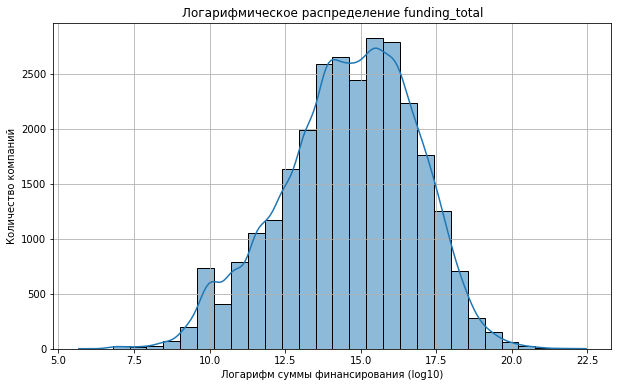

In [106]:
funding_total = df_company_filtered['funding_total']
funding_total = funding_total[funding_total > 0]
# Вычисление логарифма значений
log_funding_total = np.log(funding_total)

# Визуализация логарифмического распределения
plt.figure(figsize=(10, 6))
sns.histplot(log_funding_total, bins=30, kde=True)
plt.title('Логарифмическое распределение funding_total')
plt.xlabel('Логарифм суммы финансирования (log10)')
plt.ylabel('Количество компаний')
plt.grid()
plt.show() 

Мы видим, что данные имеют распределение приближенное к нормальному. Однако у нас достаточно большой разброс данных, поэтому для нахождения типичной суммы финансирования будем использовать медиану, не учитывая значения `funding_total` равные 0. 

In [107]:
mediana = int(df_company_filtered[df_company_filtered['funding_total'] > 0]['funding_total'].median())
display(f'Типичный размер суммы финансирования за отобранный период составляет {mediana}')

'Типичный размер суммы финансирования за отобранный период составляет 2564000'

Таким образом, мы выяснили, что типичный размер суммы финансирования за отобранный период составляет 2564000 долларов. 

__________

### 3.3. Куплены забесплатно?

Нам необходимо исследовать компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

Для решения данной задачи присоединим датафрейм `df_acquisition`, содержащий сумму сделки. 

In [108]:
# Объединяем датафреймы
df_company_and_acquisition = df_company_filtered.merge(df_acquisition, how = 'left', left_on = 'company_id', right_on = 'acquired_company_id')

Фильтруем датафрейм по необходимым условиям. 

In [109]:
df_sold_company = df_company_and_acquisition[(df_company_and_acquisition['funding_total'] > 0) & ((df_company_and_acquisition['price_amount'] == 0) | (df_company_and_acquisition['price_amount'] == 1))]

Для начала предположим, почему стартапы могли продать за 0 или 1 рубль:
- Основатели компании приняли решение выхода из бизнеса и, чтобы не нести дополнительных трат, продают его за бесплатно.
- Основатели не в состоянии выплатить долги по стартапу, поэтому передают долги следующему владельцу. Возможна продажа инвестирующей компании.
- Происходит объединение с более крупным бизнесом.
- Стартап не привлек нужного внимания, поэтому основатели продают его за символическую сумму.

Перейдем к исследованию компаний, оказавшихся в полученном датафрейме. Узнаем:
- количество таких компаний
- какая категория компаний встречается чаще всего среди них
- компании каких стран чаще всего продаются бесплатно
- типичное число инвестиционных раундов перед продажей
- типичное число раундов финансирования перед продажей
- наиболее частовстречающейся число вех финансирования в проданных компаниях
- медиана суммы финансирования выбранных компаний
  

In [110]:
# Находим количество исследуемых компаний
companies_count = df_sold_company['company_id'].count()
display(f'Было продано за бесплатно {companies_count} компаний')

'Было продано за бесплатно 1618 компаний'

In [111]:
display('Количество компаний по значениям столбца category_code')
display(df_sold_company['category_code'].value_counts())
# Рассмотрим распределение в относительных значениях
display()
display('Доля компаний по значениям столбца category_code')
df_sold_company['category_code'].value_counts() / len(df_sold_company) 

'Количество компаний по значениям столбца category_code'

software            362
web                 216
enterprise          131
mobile              118
advertising          77
games_video          76
biotech              69
ecommerce            61
network_hosting      56
semiconductor        43
cleantech            40
hardware             36
analytics            32
security             30
public_relations     26
other                20
search               18
social               17
messaging            16
travel               16
health               13
medical              11
consulting           10
education            10
news                  9
music                 8
finance               7
fashion               5
photo_video           3
hospitality           3
manufacturing         3
design                3
legal                 2
transportation        2
sports                2
automotive            2
Name: category_code, dtype: int64

'Доля компаний по значениям столбца category_code'

software           0.22
web                0.13
enterprise         0.08
mobile             0.07
advertising        0.05
games_video        0.05
biotech            0.04
ecommerce          0.04
network_hosting    0.03
semiconductor      0.03
cleantech          0.02
hardware           0.02
analytics          0.02
security           0.02
public_relations   0.02
other              0.01
search             0.01
social             0.01
messaging          0.01
travel             0.01
health             0.01
medical            0.01
consulting         0.01
education          0.01
news               0.01
music              0.00
finance            0.00
fashion            0.00
photo_video        0.00
hospitality        0.00
manufacturing      0.00
design             0.00
legal              0.00
transportation     0.00
sports             0.00
automotive         0.00
Name: category_code, dtype: float64

Визуализируем результаты распределения проданных компаний по категориям. 

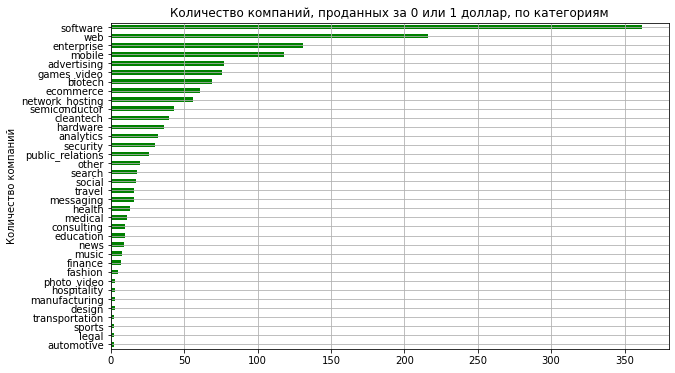

In [112]:
# Построим график, чтобы увидеть визуализировать частоту встречаемости каждой категории компаний
df_sold_company['category_code'].value_counts().sort_values(ascending = True).plot(kind = 'barh',
                                                                                   figsize = (10,6),
                                                                                   color = 'green', 
                                                                                   rot = 0,
                                                                                  xlabel = 'Количество компаний',
                                                                                  ylabel = 'Категория',
                                                                                  title = 'Количество компаний, проданных за 0 или 1 доллар, по категориям')
plt.grid()

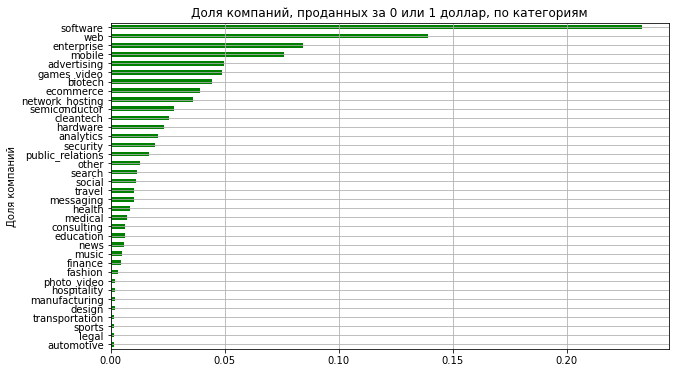

In [113]:
# Построим график, чтобы увидеть визуализировать частоту встречаемости каждой категории компаний
df_sold_company['category_code'].value_counts(normalize = True).sort_values(ascending = True).plot(kind = 'barh',
                                                                                   figsize = (10,6),
                                                                                   color = 'green', 
                                                                                   rot = 0,
                                                                                  xlabel = 'Доля компаний',
                                                                                  ylabel = 'Категория',
                                                                                  title = 'Доля компаний, проданных за 0 или 1 доллар, по категориям')
plt.grid()

Всего было продано 1618 компаний, имеющих 36 различных категорий. Заметим, что лидером среди них является категория `software`: ее имеют 362 проданные компании, что составляет 22% от общего числа. Вторая по популярности категория - `web`, к ней отнесли себя 216 компаний, их доля 13%. На третьем месте располагается категория `enterprise`, включающая в себя 131 предприятие, 8% от общего числа. 

Можно заметить, что первые две позиции занимают компании, связанные с компьютерно-информационной сферой. Возможно, стартапы в сфере it часто не выдерживают конкуренцию или неокупают инвестиции и поэтому продаются за бесплатно. Либо же их просто больше в абсолютном значении, чем остальных категорий. 

Узнаем, в каких странах, чаще всего располагаются продаваемые за бесплатно компании. 

In [114]:
display('Количество компаний по значениям столбца country_code')
display(df_sold_company['country_code'].value_counts())
# Рассмотрим распределение в относительных значениях
display()
display('Доля компаний по значениям столбца country_code')
df_sold_company['country_code'].value_counts() / len(df_sold_company) 

'Количество компаний по значениям столбца country_code'

USA    1236
GBR      64
CAN      46
DEU      31
ISR      27
FRA      24
IRL      11
DNK       9
SWE       8
ESP       7
IND       7
CHE       6
ITA       6
FIN       6
JPN       5
NLD       5
ARG       4
CHN       4
BEL       4
NOR       4
SGP       3
AUT       3
BGR       2
AUS       2
HUN       1
THA       1
UMI       1
KOR       1
POL       1
CZE       1
HKG       1
CHL       1
URY       1
TUR       1
BRA       1
RUS       1
Name: country_code, dtype: int64

'Доля компаний по значениям столбца country_code'

USA   0.76
GBR   0.04
CAN   0.03
DEU   0.02
ISR   0.02
FRA   0.01
IRL   0.01
DNK   0.01
SWE   0.00
ESP   0.00
IND   0.00
CHE   0.00
ITA   0.00
FIN   0.00
JPN   0.00
NLD   0.00
ARG   0.00
CHN   0.00
BEL   0.00
NOR   0.00
SGP   0.00
AUT   0.00
BGR   0.00
AUS   0.00
HUN   0.00
THA   0.00
UMI   0.00
KOR   0.00
POL   0.00
CZE   0.00
HKG   0.00
CHL   0.00
URY   0.00
TUR   0.00
BRA   0.00
RUS   0.00
Name: country_code, dtype: float64

Заметим, что больше всего проданных стартапов в США (1226 компаний). 

Узнаем, после скольких инвестиционных раундов продается большинство компаний. 

In [115]:
# Посмотрим статистическую информацию по столбцу
df_sold_company['investment_rounds'].describe()

count   1618.00
mean       0.01
std        0.12
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        3.00
Name: investment_rounds, dtype: float64

Мы видим, что как минимум 75% компаний были проданы после 0 инвестиционных раундов. Инвестиционные раунды представляют собой привлечение инвестиций от венчурных капиталистов или других бизнес-агентов. Отсутствие инвестиционных раундов может говорить о нежелании инвесторов вкладывать активы в данный стартап, а значит об отсутствии видения перспектив в нем и выгоды от участия. 

Возможно, что стартапы действительно не были перспективными и основатели решили продать их за символическую сумму. 


In [116]:
# Выводим статистическую информацию о числе раундов финансирования
df_sold_company['funding_rounds'].describe()

count   1618.00
mean       1.89
std        1.24
min        1.00
25%        1.00
50%        1.00
75%        2.00
max       12.00
Name: funding_rounds, dtype: float64

In [117]:
# Минимальное число раундов финансирования
df_sold_company['funding_rounds'].min()

1.0

Мы видим, что 75% компаний имели не более двух раундов финансирования и все компании имели как минимум один раунд. Число раундов финансирования можно рассматривать как индикатор роста компании. Многочисленные раунды могут указывать на положительную динамику роста, как и инвестиционные раунды. Так как в рассматриваемых компаниях их число невелико, то нельзя говорить от успешности стартапов. 

In [118]:
df_sold_company.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
25,10054,jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.00,7.00,121500000.00,3.00,9288.00,23283.00,10054.00,cash_and_stock,0.00,2013-08-13
63,101312,sidetour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0.00,3.00,4000000.00,2.00,9653.00,11391.00,101312.00,NaN,0.00,2013-09-18
66,101340,choicepass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0.00,1.00,250000.00,1.00,7272.00,1972.00,101340.00,NaN,0.00,2012-06-18
67,10137,producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0.00,3.00,1310000.00,2.00,8254.00,757.00,10137.00,cash_and_stock,0.00,2012-11-05
68,10139,tradecard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,USA,0.00,2.00,44925000.00,1.00,9326.00,44008.00,10139.00,NaN,0.00,2013-04-01


In [119]:
df_sold_company['milestones'].describe()

count   1618.00
mean       1.46
std        1.23
min        0.00
25%        0.00
50%        1.00
75%        2.00
max        6.00
Name: milestones, dtype: float64

Вехи проекта - это основные этапы развития бизнеса, которые позволяют оценить, насколько успешно подвигается стартап. 50% компаний прошли до одной вехи, а 75% - до двух. Это говорит о том, что эти стартапы не прошли много этапов и не являются уже состоявшимися компаниями.

Перейдем к анализу столбца `funding_total`. Найдем аналитически верхнюю и нижнюю границу выбросов для него. 

In [120]:
df_sold_company['funding_total'].describe()

count         1618.00
mean      18152964.00
std      144503024.00
min           3750.00
25%        2000000.00
50%        6000000.00
75%       15500000.00
max     5699999744.00
Name: funding_total, dtype: float64

Мы видим, что среднее значение значительно больше медианы, что может говорить об аномально высоких вбросах. Действительно, максимальное значение намного выше 75 процентиля.

Установим верхнюю и нижнюю границу для выбросов в этом столбце. У нас не получится использовать метод IQR, так как данные имеют широкий разброс и при обозначении нижней границы мы получим отрицательные значения, что неправильно. Поэтому вручную поставим пороги, посмотрев на процентили столбца.

In [121]:
df_sold_company['funding_total'].describe(percentiles=[0.05, 0.10, 0.15, 0.25, 0.30, 0.75, 0.80, 0.85, 0.95, 0.99])

count         1618.00
mean      18152964.00
std      144503024.00
min           3750.00
5%          250000.00
10%         513588.50
15%        1000000.00
25%        2000000.00
30%        2600000.00
50%        6000000.00
75%       15500000.00
80%       20000000.00
85%       25353735.00
95%       51487500.00
99%      151552936.64
max     5699999744.00
Name: funding_total, dtype: float64

Мы предлагаем отсортировать выбросы по 5 и 95 процентилям, так как их значения не являются аномально высокими или низкими для суммы финансирования. 

In [122]:
# Определяем верхний порог для выбросов
upper_bound = df_sold_company['funding_total'].quantile(0.95)
display(f'Верхний порог выбросов: {upper_bound}')
# Определяем нижний порог для выбросов
lower_bound = df_sold_company['funding_total'].quantile(0.05)
display(f'Нижний порог выбросов: {lower_bound}')


'Верхний порог выбросов: 51487499.99999996'

'Нижний порог выбросов: 250000.0'

Таким образом, нижняя граница для выбросов в столбце `funding_total` равна 250000 долларов, а верхняя - 51487499.99999996.

__________

### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Нам необходимо выделить категории стартапов, характеризующиеся:
- наибольшими типичными ценами;
- и наибольшим разбросом цен за стартап.

Для ответа на эти вопросы будем работать с датафреймом `df_company_and_acquisition`. Составим сводную таблицу с категориями стартапов и их медианными ценами, так как медиана менее чувствительна к выбросам, которые могут исказить результаты.

In [123]:
# Составляем сводную таблицу
pivot_grouped = pd.pivot_table(df_company_and_acquisition,
                              index = 'category_code',
                              values = 'price_amount',
                              aggfunc = 'median')
# Переименуем столбце с медианной ценой
pivot_grouped = pivot_grouped.rename(columns = {'price_amount': 'Медианная цена'})
# Отсортируем таблицу
pivot_grouped = pivot_grouped.sort_values(by = 'Медианная цена', ascending = False)
# Добавим градиент
pivot_grouped = pivot_grouped.style.background_gradient(cmap='BuGn', axis=0)
pivot_grouped

,Медианная цена
category_code,
nanotech,584000000.000000
manufacturing,72000000.000000
real_estate,50000000.000000
automotive,43000000.000000
biotech,13200000.000000
hospitality,12500000.000000
finance,600000.000000
news,0.000000
nonprofit,0.000000


Мы можем выделить семь категорий стартапов по медианной цене:
- Самый высокий показатель у стартапов категории `nanotech`. Медиана равна 584000000. Это наиболее прибыльная категория для инвесторов.
- На втором месте находится `manufacturing` (72000000 долларов)
- На третьем месте `real_estate` с медианной стоимостью продажи 50000000 долларов
- Четвертый по показателю медианной стоимости `automotive` (43000000 долларов)
- Пятая категория - `biotech` (13200000 долларов)
- Шестое место принадлежит `hospitality` (12500000 долларов)
- Финальную позицию занимает категория `finance` с медианным чеком 600000 долларов.

Для остальных категорий медиана равна 0. Это может быть связано с тем, что все строки содержат пустые значения или равны 0. 

Посчитаем разбросы между ценами продажи для стартапов по категориям:

In [124]:
# Вычисляем миниальное и максимальное значение по категориям
df_min_max = df_company_and_acquisition.groupby('category_code')['price_amount'].agg(['min', 'max'])
# Вычисляем размах и добавляем столбец в таблицу
df_min_max['Размах'] = df_min_max['max'] - df_min_max['min']

In [125]:
# Строим сводную таблицу на основе полученных данных
pivot_df_min_max = pd.pivot_table(df_min_max,
                                  index = 'category_code',
                                  values = 'Размах')
# Сортируем таблицу 
pivot_df_min_max = pivot_df_min_max.sort_values(by = 'Размах', ascending = False)
# Добавим градиент
pivot_df_min_max = pivot_df_min_max.style.background_gradient(cmap='BuGn', axis=0)
pivot_df_min_max

,Размах
category_code,
enterprise,2600000000000.000000
public_relations,39000000000.000000
biotech,20000000000.000000
other,18400000000.000000
mobile,12500000000.000000
software,10200000000.000000
games_video,10000000000.000000
security,7680000000.000000
real_estate,6850000000.000000


Наибольший размах цен имеют стартапы категории `enterprise` (2600000000000 долларов), `public_relations` (39000000000 долларов) и `biotech` (20000000000 долларов).
_____

### 3.5. Сколько раундов продержится стартап перед покупкой

Нам необходимо проанализировать столбец `funding_rounds`. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

Построим график распределения числа раундов финансирования, чтобы выяснить, встречаются ли аномально высокие или низкие значения в данных. 

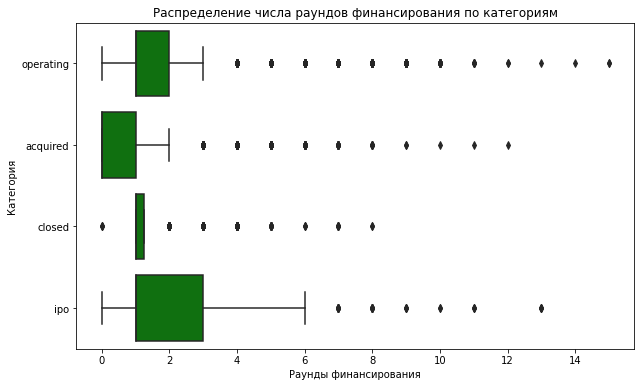

In [126]:
# Строим график
plt.figure(figsize = (10,6))
sns.boxplot(data=df_company_filtered, x='funding_rounds', y='status', color = 'green')

plt.title('Распределение числа раундов финансирования по категориям')
plt.xlabel('Раунды финансирования')
plt.ylabel('Категория')
plt.show()

По графику распределения видно, что во всех случаях встречаются данные, выходящие за границы ящика с усами. Однако они не являются аномальными значениями, так как числа реалистичны для количества раундов финансирования. 

Создадим сводную таблицу по статусу стартапов и их среднему числу раундов.

In [127]:
pivot_rounds = pd.pivot_table(df_company_filtered,
                              index = 'status',
                              values = 'funding_rounds',
                              aggfunc = 'mean')

# Переименуем столбец со средним числом раундов
pivot_rounds = pivot_rounds.rename(columns = {'funding_rounds': 'Среднее число раундов финансирования'})
# Отсортируем таблицу
pivot_rounds = pivot_rounds.sort_values(by = 'Среднее число раундов финансирования', ascending = False)
# Добавим градиент
pivot_rounds_styler = pivot_rounds.style.background_gradient(cmap='BuGn', axis=0)
pivot_rounds_styler

,Среднее число раундов финансирования
status,
ipo,1.934375
operating,1.522695
closed,1.381453
acquired,0.523526


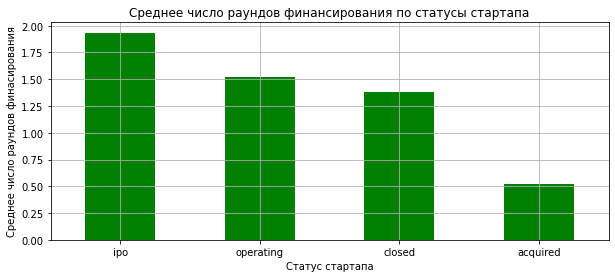

In [128]:
# Построим график для сравнения числа раундов категорий
funding_categories = pivot_rounds.sort_values(by = 'Среднее число раундов финансирования', ascending = False).plot(kind = 'bar',
                                                                                                                 figsize = (10,4),
                                                                                                                title = 'Среднее число раундов финансирования по статусы стартапа',
                                                                                                                xlabel = 'Статус стартапа',
                                                                                                                ylabel = 'Среднее число раундов финасирования',
                                                                                                                  rot = 0,
                                                                                                                color = 'green',
                                                                                                                legend = False)
plt.grid()

По графику видно, что в среднем больше раундов финансирования имеют стартапы, вышедшие на `IPO`. их показатель - 1.93 раунда. Это связано с тем, что для достижения такого статуса компаниям требуются значительные капиталовложения в бизнес для масштабирования своей деятельности. Также перед выходом на IPO компании могут проводить дополнительные раунды финансирования, чтобы сбалансировать свои финансовые показатели и привлечь большее внимание инвесторов.

У стартапов статуса `operating` показатель среднего числа раундов финансирования меньше - 1.52. Такие стартапы могут находиться на пути к выходу на IPO, они не долшли до этого этапа, а значит, потратили меньше ресурсов на рост, в том числе и финансовых. Они могут быть сосредоточены не на выход на новый рынок, а на разработке продукта и оценке собственного рынка. 

Стартапы со статусом `closed` еще меньше среднее число раундов финасирования - 1.38. Возможно, эти стартапы были закрыты по причине неокупаемости капиталовложений, а также отсутствия устойчивого уровня дохода и невозможности привлечь нужное внимание инвесторов, поэтому их показатель меньше. 

У стартапов со статусом `acquired` в среднем раундов меньше одного - 0.52. Такой результат может иметь несколько причин:
- Стартап изначально планировался для целевой продажи, а не масшатбирования. Такие компании фокусируются на продукте и привлечения крупных компаний за счет достижения определенных показателей.
- Стартап сразу может оказаться прибыльным, поэтому ему не потребуются дополнительные раунды финансирования. Такие компании привлекательны для крупных покупателей.
- Иногда стартапы производя уникальный продукт или услугу, что привлекает внимание крупных компаний, готовых купить стартап без дополнительного финансирования.
___________

### Промежуточные выводы

В результате исследования мы:
- Выяснили, что среди всех данных 40745 стартапов вменили владельца или готовы к таким изменениям.
- Выяснили, что типичный размер суммы финансирования (столбец `funding_total`) за отобранный период составляет 2564000 долларов.
- Предположили, что некоторые компании были проданы за 0 или 1 доллар по причине невозможности привлечь инвестиции и отсутствия перспективы развития. 
- Установили нижнюю и верхнюю границы для выбросов в столбце `funding_total`: 250000 и 51487499.99999996 долларов соотвественно.
- Установили, что в тройку лидеров по медианной цене вошли стартапы категорий `nanotech`, `manufacturing` и `real_estate`.
- Выяснили, что в тройку лидеров по размаху цен вошли компании категорий `enterprise`, `public_relations` и `biotech`.
- Узнали, что больше всего раундов финансирования имеют компании, вышедшие на IPO, а наименьшее - компании со статусом `acquired`.
________

## 4. Итоговый вывод и рекомендации
### 4.1 Общий обзор проделанной работы
В ходе проделанной работы мы проанализировали данные стартапов, включавшие в себя сведения о компании, ее инвестиционных раундах и раундах финансирования, а также информацию о сотрудниках и их образовании. Акцент исследования был сделан на то, чтобы дать рекомендации финансовой компании, которая предоставляет льготные займы стартапам, по выходу на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. 

### 4.2 Ответы на исследовательские вопросы и главные выводы.
В ходе исследования мы получили такие результаты:
- Наивысший средний объем средств, привлеченных за один раунд финансирования, был зафиксирован в 2000 году и составил 11 485 509 денежных единиц. У нас есть данные до 2013 года, и можно отметить, что до этого времени наблюдался явный тренд роста количества раундов финансирования, в то время как средний размер средств, выделяемых на один раунд, колебался, демонстрируя как рост, так и снижение.
- Чаще всего информацию о сотрудниках скрывают микрокомпании и небольшие предприятия. Вероятно, это связано с тем, что они стремятся избежать рисков для своего положения на рынке и не хотят уступать конкурентам из-за возможного более низкого уровня образования своих работников.
- Заказчик был прав. Ранее данные о компаниях и раундах финансирования хранились в более удобном для анализа виде. Датафрейм `df_company_and_rounds` был образован соединением двух датафреймов: первый содержал информацию о компаниях, второй - о раундах финансирования. Мы привели данные в первоначальный вид.
- Ряд компаний мог быть продан за 0 или 1 доллар из-за трудностей с привлечением инвестиций и отсутствием перспектив для дальнейшего роста.
- Стартапы из категорий нанотехнологий, производства и недвижимости заняли три ведущие позиции по медианной стоимости.
- Компании из сфер корпоративных услуг, связей с общественностью и биотехнологий входят в тройку лидеров по диапазону цен продажи.

### 4.3 Рекомендации

Мы рекомендуем обратить внимание на компании, относящися к категории `real_estate` и `biotech`, так как стартапы этих категорий демонстрируют высокий чек продажи и большой размах цен. Широкий диапазон цен предоставляет инвесторам возможность найти стартапы на разных стадиях развития и с различным уровнем риска. Это позволяет диверсифицировать инвестиционный портфель. Также инвестор сможет выбирать стартапы в зависимости от своих стратегий и целей — от более рискованных, но потенциально высокодоходных до более стабильных и предсказуемых.

Наиболее часто за 0 или 1 доллар продаются компании категории `soft_ware`, `web` и `enterprice`. Это может говорить о высоком риске отсутствия перспектив и неокупаемости вложений. Поэтому не следует выбирать такие стартапы для инвестиций. В это же время категории среди компаний. проданных бесплатно, нет категории `real_estate`, а доля стартапов `biotech` всего 4%. Это подтвержает выгоду от выбора инвестиций в них.

Большая часть компаний продается с небольшим числом раундов финансирования (до 1). Рекомендуем не превышать 2-3 раундов, так как это позволит получить стартапу достаточный для начального развития капитал и не размыть доли ранних инвесторов.